In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
plt.style.use("seaborn")


C:\Users\Hp\AppData\Local\Temp\ipykernel_46296\2544286613.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
data = pd.read_csv("framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
data.describe

<bound method NDFrame.describe of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0      

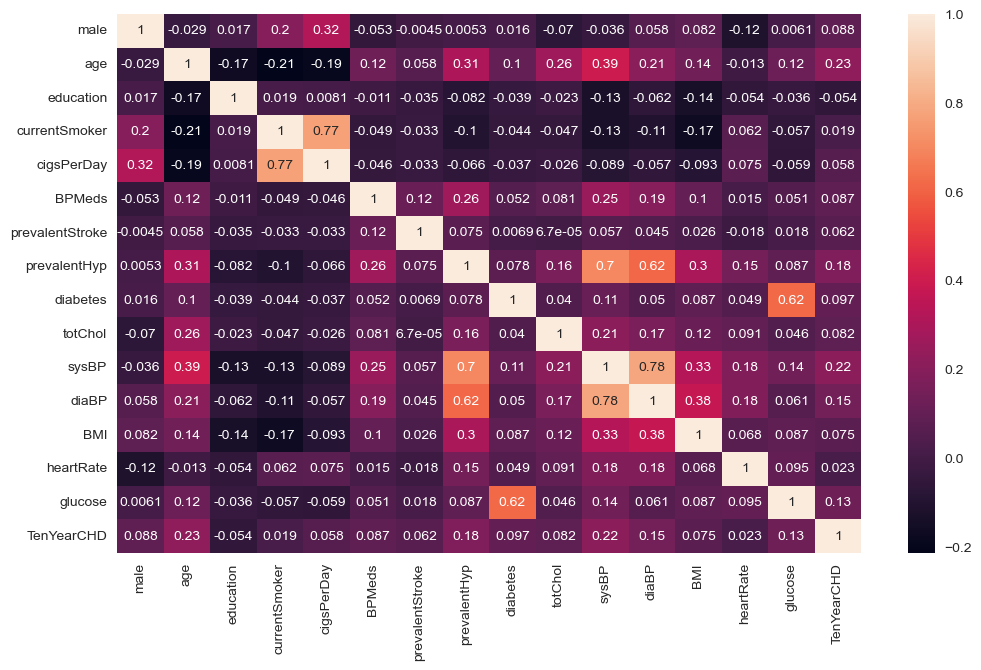

In [7]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr() , annot =True)
plt.show()

In [8]:
data = data.fillna(data.mean())

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [10]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
X = data[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']]
y = data['TenYearCHD']

In [12]:
# Feature Scaling

def featurescaling(X):
    Xmean = X.mean(axis=0)
    Xstd = X.std(axis=0)
    
    return (X - Xmean)/Xstd

In [13]:
X = featurescaling(X)

C:\Users\Hp\AppData\Local\Temp\ipykernel_46296\318978872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['age'] , hist = True)


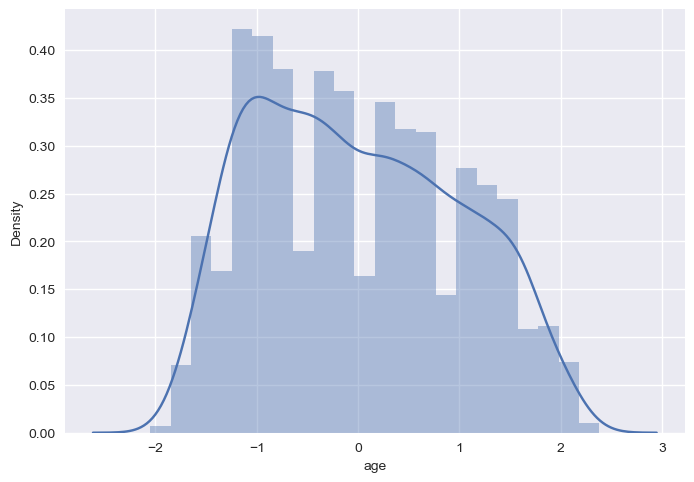

In [14]:
sns.distplot(X['age'] , hist = True)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_46296\1754899008.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['education'] , hist = True)


<Axes: xlabel='education', ylabel='Density'>

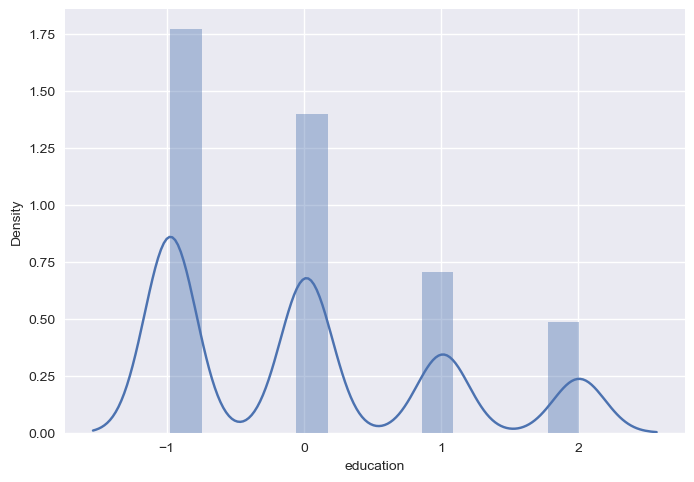

In [16]:
sns.distplot(X['education'] , hist = True)

In [18]:
X.std(axis=0) , X.mean(axis=0)

(male               1.0
 age                1.0
 education          1.0
 currentSmoker      1.0
 cigsPerDay         1.0
 BPMeds             1.0
 prevalentStroke    1.0
 prevalentHyp       1.0
 diabetes           1.0
 totChol            1.0
 sysBP              1.0
 diaBP              1.0
 BMI                1.0
 heartRate          1.0
 glucose            1.0
 dtype: float64,
 male               1.173619e-17
 age                1.408343e-16
 education          6.748312e-17
 currentSmoker      8.382996e-18
 cigsPerDay        -1.089789e-16
 BPMeds            -2.347239e-17
 prevalentStroke   -1.005960e-17
 prevalentHyp      -4.862138e-17
 diabetes           0.000000e+00
 totChol            3.126857e-16
 sysBP             -4.560350e-16
 diaBP              2.984347e-16
 BMI                9.456019e-16
 heartRate          1.193739e-15
 glucose            1.735280e-16
 dtype: float64)

C:\Users\Hp\AppData\Local\Temp\ipykernel_46296\240960744.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['age'] , hist = True)


<Axes: xlabel='age', ylabel='Density'>

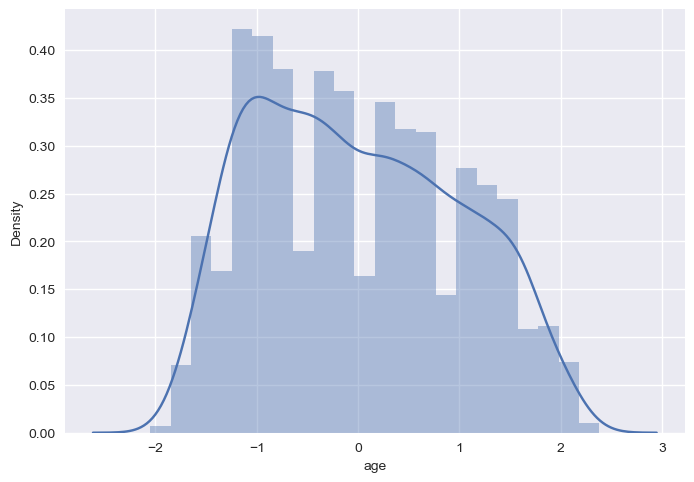

In [19]:
sns.distplot(X['age'] , hist = True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_46296\2451230688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['currentSmoker'] , hist = True)


<Axes: xlabel='currentSmoker', ylabel='Density'>

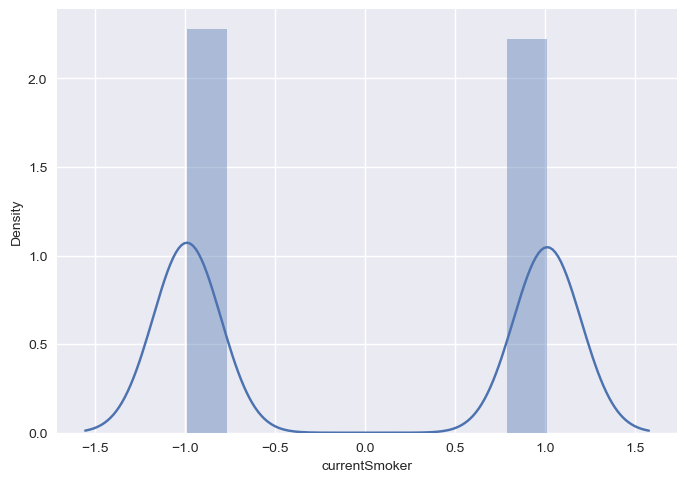

In [20]:
sns.distplot(X['currentSmoker'] , hist = True)

In [21]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

C:\Users\Hp\AppData\Local\Temp\ipykernel_46296\278471196.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['cigsPerDay'],hist = True)


<Axes: xlabel='cigsPerDay', ylabel='Density'>

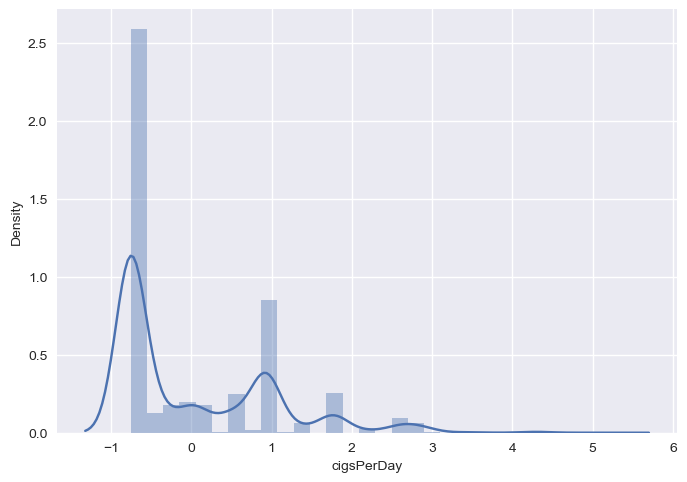

In [22]:
sns.distplot(X['cigsPerDay'],hist = True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_46296\869085644.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['BPMeds'] , hist = True)


<Axes: xlabel='BPMeds', ylabel='Density'>

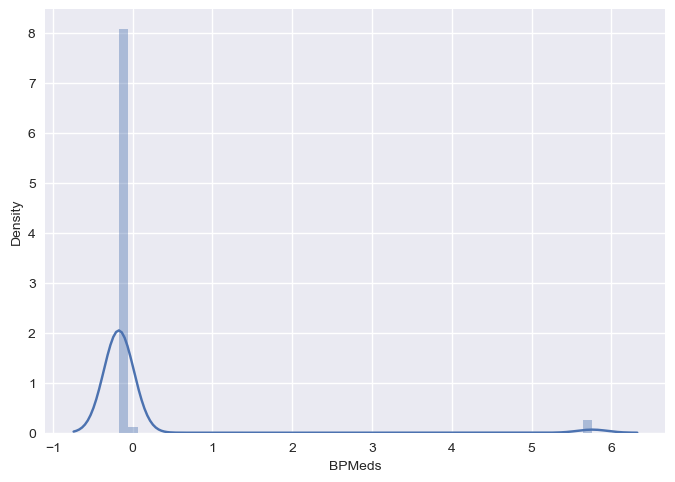

In [23]:
sns.distplot(X['BPMeds'] , hist = True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_46296\3550233709.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['heartRate'],hist = True)


<Axes: xlabel='heartRate', ylabel='Density'>

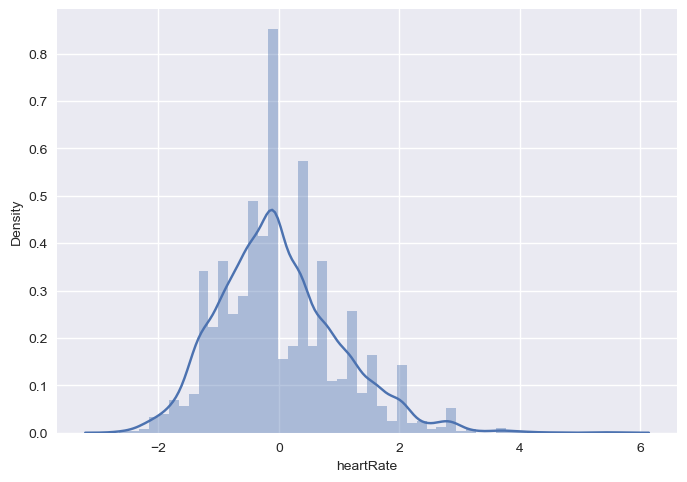

In [24]:
sns.distplot(X['heartRate'],hist = True)

In [25]:
new_data = pd.DataFrame(X,y)

In [26]:
new_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,1.153056,-1.234805,2.006851,-0.988154,-0.757885,-0.175823,-0.077023,-0.671022,-0.162457,-0.941234,-1.195766,-1.082497,0.286909,0.342704,-0.217491
0,1.153056,-1.234805,2.006851,-0.988154,-0.757885,-0.175823,-0.077023,-0.671022,-0.162457,-0.941234,-1.195766,-1.082497,0.286909,0.342704,-0.217491
0,1.153056,-1.234805,2.006851,-0.988154,-0.757885,-0.175823,-0.077023,-0.671022,-0.162457,-0.941234,-1.195766,-1.082497,0.286909,0.342704,-0.217491
1,-0.867056,-0.418208,0.020902,-0.988154,-0.757885,-0.175823,-0.077023,-0.671022,-0.162457,0.299560,-0.515126,-0.158970,0.719240,1.590087,-0.261280
0,1.153056,-1.234805,2.006851,-0.988154,-0.757885,-0.175823,-0.077023,-0.671022,-0.162457,-0.941234,-1.195766,-1.082497,0.286909,0.342704,-0.217491


In [29]:
# Outlier Removal

def outlier(new_data):
    q1 = np.percentile(new_data,25)
    q3 = np.percentile(new_data,75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    filtered_data = data[(data>=lower_bound) & (data<= upper_bound)]
    
    return filtered_data

In [30]:
new1_data = outlier(new_data)

In [31]:
new1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              0 non-null      float64
 2   education        3078 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       2229 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          0 non-null      float64
 10  sysBP            0 non-null      float64
 11  diaBP            0 non-null      float64
 12  BMI              0 non-null      float64
 13  heartRate        0 non-null      float64
 14  glucose          0 non-null      float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(10), int64(6)
memory usage: 529.9 KB


In [32]:
new1_data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [33]:
X = new1_data[['male','currentSmoker' , 'BPMeds' , 'prevalentStroke', 'prevalentHyp', 'diabetes']]
y = new1_data['TenYearCHD']

In [34]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X,y)

In [35]:
model = LogisticRegression(multi_class = 'ovr')

In [36]:
model.fit(Xtrain,Ytrain)

LogisticRegression(multi_class='ovr')

In [37]:
model.predict(Xtest)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
model.score(Xtest, Ytest)

0.8377358490566038

In [40]:
model.score(Xtrain,Ytrain)

0.8527375707992448